In [37]:
import pandas as pd
import numpy as np

In [38]:
data=pd.read_csv("spam_ham_dataset.csv", encoding="latin-1")

In [39]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [40]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [41]:
data.drop(['Unnamed: 0', 'label_num'], axis=1, inplace=True)

In [42]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [43]:
data['label']=data['label'].map({'ham':0, 'spam':1})

In [44]:
data.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


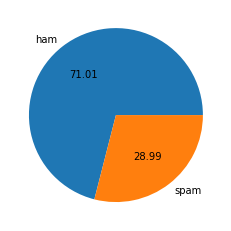

In [47]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X=data['text']
y=data['label']

In [51]:
X.shape

(5171,)

In [52]:
y.shape

(5171,)

In [53]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [54]:
cv=CountVectorizer()

In [55]:
X=cv.fit_transform(X)

In [56]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
x_train.shape

(4136, 50447)

In [58]:
x_test.shape

(1035, 50447)

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
model=MultinomialNB()

In [61]:
model.fit(x_train, y_train)

MultinomialNB()

In [62]:
model.score(x_test, y_test)

0.978743961352657

In [63]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [64]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))
pickle.dump(cv,open("vectorizer.pkl","wb"))